In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
#from common import load_classes
def load_classes(file, path=Path('.')):
    path = path/'models'
    file = path/file
    filestr = str(file)
    with open(filestr + '.classes', 'r') as f:
        return json.loads(f.read())
#path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
path = Path('.')
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
model_name = 'stage-2-resnet34-224px-spanish-white'
classes = load_classes(model_name)
SIZE = 224
classes

['2',
 'A',
 'G',
 'T',
 'E',
 '6',
 'X',
 'R',
 '7',
 '8',
 'D',
 'F',
 '1',
 'B',
 '3',
 '5',
 'C',
 '0',
 'H',
 '4']

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet34)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
#learn.model = torch.nn.DataParallel(learn.model)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\gzmv76/.torch\models\resnet34-333f7ec4.pth
100%|██████████████████████████| 87306240/87306240 [02:49<00:00, 515837.32it/s]


In [5]:
#learn.path = Path('.')
learn.load(model_name)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict(image_path, invert = False):
    img = cv2.imread(image_path)
    if invert:
        img = cv2.bitwise_not(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    #cv2.imwrite('invert.png',img)
    #img = open_image("invert.png")
    #img.show()
    #img = cv2.imread('invert.png')
    img = cv2.resize(img, (SIZE,SIZE))
    plt.imshow(img)
    cv2.imwrite('predict.png',img)
    img = open_image("predict.png")
    return learn.predict(img)

('4',
 tensor(19),
 tensor([1.2003e-01, 3.8614e-02, 1.9197e+01, 4.9554e+00, 1.4397e-01, 1.2172e-01,
         1.0832e-02, 5.7826e-02, 1.5392e+02, 6.3555e-01, 1.7428e-01, 1.8072e-01,
         4.7484e+00, 2.6870e-02, 1.6570e-01, 2.2360e+00, 1.6640e-02, 5.2971e-02,
         6.2853e-02, 2.2312e+04]))

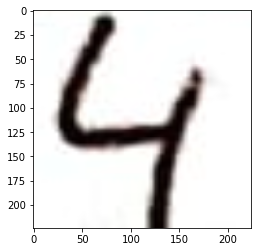

In [7]:
predict('test/4.png')

('C',
 tensor(16),
 tensor([3.1564e+00, 7.1004e+00, 2.0640e+01, 4.7238e-01, 1.1641e+01, 1.3250e+01,
         4.3412e-01, 4.8496e+00, 4.7001e-02, 1.0089e-01, 2.0485e+00, 3.8404e-02,
         2.6944e-01, 6.2457e-01, 3.0591e-01, 1.5080e+00, 6.0209e+01, 9.8971e+00,
         3.5940e-01, 4.4210e-02]))

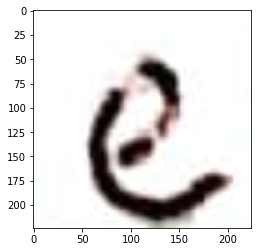

In [8]:
predict('test/e.png')

('3',
 tensor(14),
 tensor([3.3254e+00, 2.0777e-02, 2.1859e+00, 2.5816e-01, 9.4712e-01, 1.4297e-01,
         4.9211e-02, 2.8193e-02, 4.6418e-02, 1.1114e-01, 6.0270e-02, 3.4076e-01,
         1.8996e+00, 5.4214e+00, 5.7776e+03, 9.0394e+01, 5.7316e-01, 3.0411e-02,
         9.1176e+00, 5.6456e-02]))

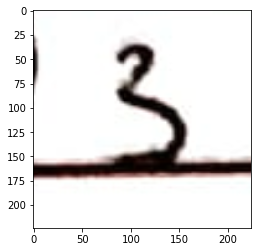

In [9]:
predict('test/3-underline.png')

('4',
 tensor(19),
 tensor([6.0642e-01, 1.0514e-02, 2.3513e+00, 5.5064e-01, 1.8979e+01, 1.9598e-01,
         2.1125e+00, 1.9145e-02, 1.0071e-01, 1.3163e-02, 3.5485e-02, 4.9490e-01,
         6.7745e-01, 2.5588e-01, 1.0369e-01, 1.2846e+01, 9.5392e-01, 6.1608e-03,
         3.3239e+00, 5.5595e+02]))

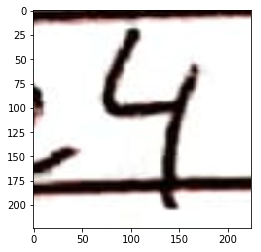

In [10]:
predict('test/4-upper-underline.png')

('5',
 tensor(15),
 tensor([1.6158e+00, 2.1830e-01, 9.8179e+00, 1.4770e-01, 5.0521e+01, 1.8809e+01,
         1.2306e+00, 6.3552e-02, 4.5412e-03, 1.7255e-01, 7.3705e-01, 6.6055e-02,
         1.9208e-01, 5.0974e+00, 1.4086e+00, 1.3859e+02, 3.0647e+00, 3.9364e-02,
         1.4131e+01, 9.5963e-02]))

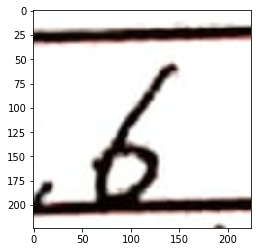

In [11]:
predict('test/6-upper-underline.png')

('F',
 tensor(11),
 tensor([1.4915e+00, 3.1533e-01, 2.4792e+00, 4.6045e-01, 2.1462e+00, 5.1559e-02,
         2.6366e-02, 1.5991e-01, 2.5008e+01, 1.0837e+00, 6.3193e-02, 3.3006e+02,
         6.7264e-01, 3.6954e+00, 2.2221e+01, 3.5757e-01, 1.6553e-01, 1.9379e-02,
         3.2142e+01, 4.2837e-02]))

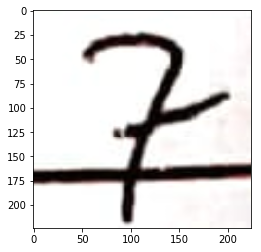

In [12]:
predict('test/7-underline.png')

('A',
 tensor(1),
 tensor([7.9155e+00, 1.6896e+02, 3.2598e-01, 7.6324e-02, 2.9263e-01, 2.9543e-01,
         2.0845e-02, 1.2520e-01, 1.7044e-02, 4.0804e-02, 3.3391e+01, 2.5323e-01,
         7.2099e+00, 3.8768e+00, 5.2679e-02, 6.6800e-02, 1.2560e-01, 1.0648e+00,
         1.6457e+01, 2.8503e+00]))

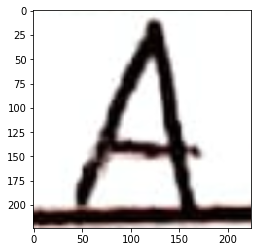

In [13]:
predict('test/a-underline.png')

('C',
 tensor(16),
 tensor([1.0583e+01, 3.1780e-01, 1.7796e+00, 4.2744e-01, 8.1306e-01, 1.1181e+00,
         1.2324e-01, 6.4582e-01, 1.0622e-01, 5.3861e-02, 1.4666e+01, 1.9234e+00,
         1.3356e+00, 7.6654e-01, 2.5485e-01, 5.0504e+01, 8.6177e+01, 1.9160e+00,
         9.6731e-01, 1.5833e-01]))

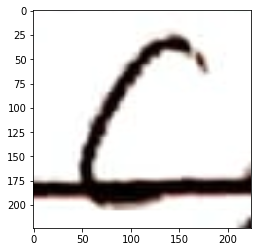

In [14]:
predict('test/c-underline.png')

('F',
 tensor(11),
 tensor([9.7965e+00, 2.3687e-02, 1.6279e+00, 6.9740e-01, 2.6054e+00, 7.0984e-01,
         3.7396e+00, 3.9004e-01, 3.6713e-01, 3.1362e+01, 4.0687e+00, 5.8345e+01,
         1.3003e-01, 2.4866e-01, 2.4280e-01, 2.5359e+00, 8.0877e-01, 1.6085e-01,
         1.1871e+01, 2.9196e+00]))

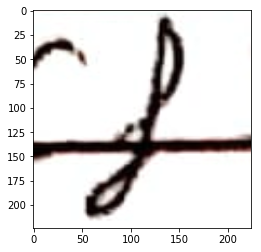

In [15]:
predict('test/f-underline.png')

('G',
 tensor(2),
 tensor([2.0593e-01, 1.5843e-01, 3.1519e+02, 1.4350e-01, 1.0915e+00, 8.2948e-02,
         2.5842e-02, 7.3512e-02, 6.2866e-01, 6.1102e-01, 1.6425e-02, 1.3749e+02,
         2.7909e-02, 8.0877e+00, 2.3116e+00, 6.9353e+00, 6.4517e-01, 1.3318e-02,
         3.1065e+00, 2.8639e-01]))

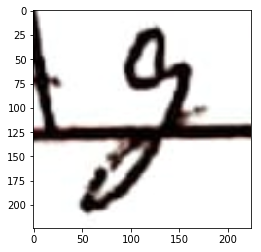

In [16]:
predict('test/g-underline-2.png')

('G',
 tensor(2),
 tensor([1.7409e+00, 9.6594e-02, 1.5599e+02, 5.5800e-01, 2.7896e+00, 5.5235e-01,
         2.5181e-01, 1.7029e-01, 3.7978e-02, 2.3392e+00, 3.4919e+00, 2.4845e+01,
         9.8333e-02, 9.7685e-01, 1.4924e-01, 1.0119e+00, 2.3767e-01, 1.4620e+00,
         1.9788e+00, 7.7549e-01]))

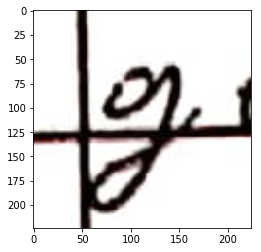

In [17]:
predict('test/g-underline.png')